## Practice Example: New York City - East River Bicycle Crossings

### Context

The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months.

### Content
A count of the number of bicycles on each of the bridges in question is provided on a day-by-day basis, along with information on maximum and minimum temperature and precipitation.

In [108]:
# Required libraries
import numpy as np
import pandas as pd
from pandas.lib import Timestamp
from pandas import read_csv
from numpy import ufunc

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

# Creating bikes dataframe
df = pd.read_csv('nyc-east-river-bicycle-counts.csv')
print(df)

     Index            Date             Day  High Temp (°F)  Low Temp (°F)  \
0        0   1/4/2016 0:00   1/4/2016 0:00            78.1           66.0   
1        1   2/4/2016 0:00   2/4/2016 0:00            55.0           48.9   
2        2   3/4/2016 0:00   3/4/2016 0:00            39.9           34.0   
3        3   4/4/2016 0:00   4/4/2016 0:00            44.1           33.1   
4        4   5/4/2016 0:00   5/4/2016 0:00            42.1           26.1   
5        5   6/4/2016 0:00   6/4/2016 0:00            45.0           30.0   
6        6   7/4/2016 0:00   7/4/2016 0:00            57.0           53.1   
7        7   8/4/2016 0:00   8/4/2016 0:00            46.9           44.1   
8        8   9/4/2016 0:00   9/4/2016 0:00            43.0           37.9   
9        9  10/4/2016 0:00  10/4/2016 0:00            48.9           30.9   
10      10  11/4/2016 0:00  11/4/2016 0:00            62.1           46.0   
11      11  12/4/2016 0:00  12/4/2016 0:00            57.0           45.0   

As seen from the dataframe, the 'Day' column is of the same datatype as the 'Date' column. As such, let's clean the dataset and add in a proper 'Day' column to better assist our analysis in the later steps.

## Cleaning and formatting our dataset

In [109]:
# Deleting the irrelevant 'Day' column
del df['Day']

# Converting type string 'Date' to type datetime 
df['Date'] =  pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')
print(type(df['Date'][0]))
for date in df['Date']:
    # Extract only the date portion and discard time portion
    date = date.date()

# Using Series.dt.dayofweek Pandas' documentation
days = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}

# Get the index for the day of the week
df['Day'] = df['Date'].dt.dayofweek
# Get the respective day for each date
df['Day'] = df['Day'].apply(lambda x: days[x])

<class 'pandas._libs.tslib.Timestamp'>


## Building our model
After cleaning our dataset, we can now get to building our model. Let's start with a regression model first. We shall analyse to see if precipitation affects the number of bikes traveling across each bridge.

T represents 'trace of precipitation', S represents 'snow' in the data for 'Precipitation'.

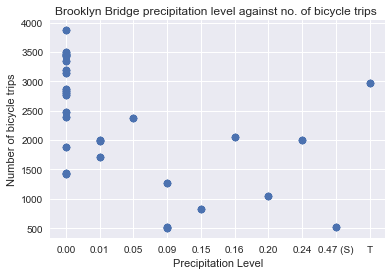

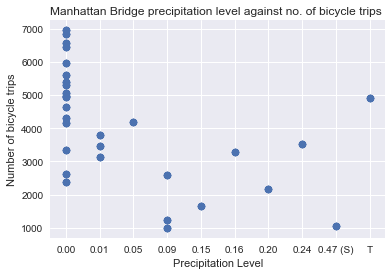

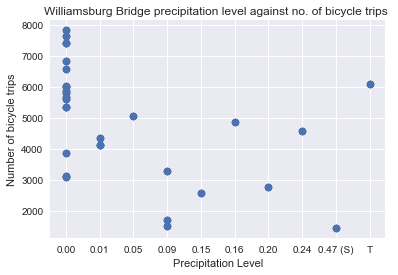

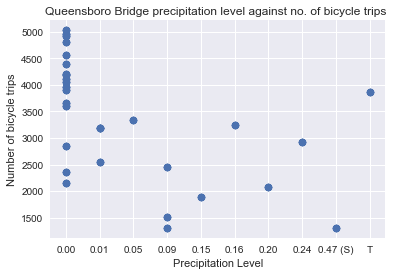

In [110]:
# Scatterplot to see relationship between precipitation and number of bike trips across all bridges
bridges = ['Brooklyn Bridge','Manhattan Bridge','Williamsburg Bridge','Queensboro Bridge']
for i in range(len(bridges)):
    plt.title(bridges[i] + ' precipitation level against no. of bicycle trips ')
    plt.scatter(df['Precipitation'],df[bridges[i]])
    plt.xlabel("Precipitation Level")
    plt.ylabel("Number of bicycle trips")
    plt.show()

From the simple scatterplot above, it does seem like the level of precipitation affects the number of bikers across any bridge.

## Type of regression model
Now, let us consider what type of regression model we should build for this relationship we are trying to derive. Given that 'Precipitation' and 'Number of bicycle trips' are both continuous variable, we shall use Linear Regression here.

Before we build the linear regression model, it is good to remember that the parameters should be continuous. Hence, we need to now further clean our dataset to remove rows with 'T' and 'S' as data.

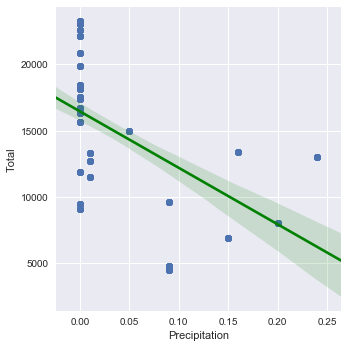

In [111]:
# Removal of rows with 'T' and '0.47 (S)' in Precipitation columns
df = df.loc[df['Precipitation'] != 'T']
df = df.loc[df['Precipitation'] != '0.47 (S)']

# Need to reset indexing for Dataframe because some rows were removed initially and some index have been removed
df = df.reset_index(drop=True)

# Converting type String 'Precipitation' and 'Total' to type Float in order for linear regression analysis to run
df['Precipitation'] = df['Precipitation'].astype(float)
df['Total'] = df['Total'].astype(np.float64)

sns.lmplot(x='Precipitation',y='Total',data=df,fit_reg=True, line_kws={'color': 'green'})
plt.show()

## Conclusion

As seen in the plot above, the green line we've plotted is actually the linear regression model! Looking at the regression line, we can tell that as the amount of precipitation increases, it's less likely that people will use bicycles as a mode of transport across the bridges to get across the East River. This makes sense, since it would be dangerous to ride on a rainy day and the lack of shelter when cycling will also get a person drenched.

The grey shape behind it is the standard error. Looking at the error, we can tell that we're pretty sure about our prediction for low precipitation, but as we move to the right, we get less certain and our error increases.